## 2. Airbnb Singapore

In [2]:
# import the required packages
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import random
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
%matplotlib inline
import time 

# For logistic and linear regression
from sklearn.linear_model import LinearRegression

# For decision tree
from sklearn import tree
from sklearn.metrics import mean_squared_error

# For ANN
from sklearn.neural_network import MLPRegressor

# For AdaBoost
from sklearn.ensemble import AdaBoostRegressor

# For K-folds cross validation
from sklearn.model_selection import cross_val_score, cross_validate

# Evaluating Regression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [3]:
def print_results(results):
    print("BEST PARAM: {}\n".format(results.best_params_))
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print("{} (+/1 {}) for {}".format(round(mean, 3), round(std*2,3), params))
        

### 2.1 Load and Sample the data

#### Loading the HR Data

In [114]:
# Load the full dataset
dfa = pd.read_csv('listings_new.csv')

Text(0.5, 1.0, 'Price Distribution')

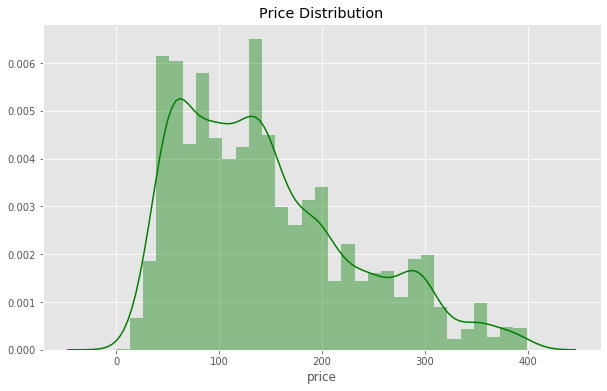

In [5]:
# Import required libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

# Set figure size with matplotlib
fig, ax = plt.subplots(figsize=(10,6))

# Plot a simple histogram with binsize determined automatically
ax1 = sns.distplot(dfa['price'], ax=ax, color="g")
ax1.set_title("Price Distribution")

In [6]:
dfa.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,year,month,day
0,1,24,0,81,0.089089,3,0.020785,0,365,2014,12,26
1,1,26,0,44,0.014014,3,0.016936,2,331,2019,4,21
2,1,26,0,40,0.029029,2,0.007698,2,276,2018,9,13
3,1,32,0,65,0.001001,3,0.103156,1,336,2019,8,22
4,1,26,0,44,0.029029,3,0.010778,2,340,2019,2,2


In [7]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6180 entries, 0 to 6179
Data columns (total 12 columns):
neighbourhood_group               6180 non-null int64
neighbourhood                     6180 non-null int64
room_type                         6180 non-null int64
price                             6180 non-null int64
minimum_nights                    6180 non-null float64
number_of_reviews                 6180 non-null int64
reviews_per_month                 6180 non-null float64
calculated_host_listings_count    6180 non-null int64
availability_365                  6180 non-null int64
year                              6180 non-null int64
month                             6180 non-null int64
day                               6180 non-null int64
dtypes: float64(2), int64(10)
memory usage: 579.5 KB


In [8]:
# Drop all the rows with NA records
dfa = dfa.dropna()
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6180 entries, 0 to 6179
Data columns (total 12 columns):
neighbourhood_group               6180 non-null int64
neighbourhood                     6180 non-null int64
room_type                         6180 non-null int64
price                             6180 non-null int64
minimum_nights                    6180 non-null float64
number_of_reviews                 6180 non-null int64
reviews_per_month                 6180 non-null float64
calculated_host_listings_count    6180 non-null int64
availability_365                  6180 non-null int64
year                              6180 non-null int64
month                             6180 non-null int64
day                               6180 non-null int64
dtypes: float64(2), int64(10)
memory usage: 627.7 KB


#### Sampling the Airbnb Data

In [115]:
# Define Model Inputs (X_a) and Output (y_a)
X_a = dfa.drop('price',axis=1)
y_a = dfa["price"]

In [116]:
# Split both Inputs (X_a) and Ouput (y_a) into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X_a, y_a, test_size=0.3, random_state=1)

In [36]:
X_train['room_type']

587     1
4779    1
3759    1
3255    0
2107    0
       ..
905     0
5192    1
3980    1
235     0
5157    0
Name: room_type, Length: 4326, dtype: int64

### 2.2 Build the Model(s)

### 2.2.1 Using Linear Regression

#### Train the Model using testing

In [7]:
# train the model using training set
lm = LinearRegression()
lm.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### Calculated the fitted values for training set
y_fitted = lm.predict(X_train)

#### Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_fitted, y_train)), '(Train RMSE)') # RMSE: the lower the better
print(lm.score(X_train, y_train), '(Train R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

#### Evaluate the Model using testing

In [13]:
# calculated the predicated value for testing data
y_pred = lm.predict(X_test)

# Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_pred, y_test)), '(Test RMSE)') # RMSE: the lower the better
print(lm.score(X_test, y_test), '(Test R^2 Value)') # R squared value (ranges from 0 to 1): the higher the better

66.11232668831093 (Test RMSE)
0.38927297123448695 (Test R^2 Value)


#### Improving the Model (By reducing RMSE)

Linear Regression Model has no hyper parametars to be tuned as it has already found out the best line or hyperlane which minimizes RMSE. To further improve the model, we need to utimize `statsmodel` package to find out the p-values for each coefficient so as to understand our confidence levels on each coefficient.

In [52]:
# The lm model refers to sklearn model and lm2 model refers to statsmodel.api model

# Create another model lm2 using statsmodel.api: the Ordinary Least Squares (OLS) method and fit function
lm2 = sm.OLS(y_train, X_train).fit()
# Summary statistics from the model
lm2.summary()

# focus on the P value (P>|t|) --> the lower the P value (probability), the stronger the prediction
# some variables are more useful than others
# coeff --> B values

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              2200.
Date:                Tue, 19 Jan 2021   Prob (F-statistic):                        0.00
Time:                        21:16:30   Log-Likelihood:                         -24282.
No. Observations:                4326   AIC:                                  4.859e+04
Df Residuals:                    4315   BIC:                                  4.866e+04
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
neighbourhood_group               -8.8269      4.362     -2.024      0.043     -17.378      -0.276
neighbourhood                      1.5247      0.178      8.589      0.000       1.177       1.873
room_type                        101.4332      2.265     44.789      0.000      96.993     105.873
minimum_nights                  -295.6185     29.491    -10.024      0.000    -353.436    -237.801
number_of_reviews                 -3.6001      0.972     -3.702      0.000      -5.507      -1.694
reviews_per_month                 38.7452     14.835      2.612      0.009       9.661      67.830
calculated_host_listings_count    -6.1259      1.066     -5.746      0.000      -8.216      -4.036
availability_365                   0.0980      0.008     12.146      0.000       0.082       0.114
year                               0.0227      0.003      6.890      0.000       0.016       0.029
month                              0.3741      0.505      0.741      0.458      -0.615       1.363
day                               -0.0140      0.137     -0.102      0.919      -0.283       0.255
==============================================================================
Omnibus:                      644.844   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1012.372
Skew:                           1.035   Prob(JB):                    1.47e-220
Kurtosis:                       4.153   Cond. No.                     5.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above model summary, we can see that `neighbourhood_group`, `neighbourhood`, `room_type`, `minimum_nights`, `number_of_reviews`, `reviews_per_month?`,`calculated_host_listings_count`, `availability_365` and `year` have close to ZERO **p-value** (i.e. the column `P>|z|`). It means we have very high confidence on the coefficients of these features, or say these features are the most strong indicators to predict `is_promoted`. 

On the other hand,  `month` and `day` have very high **p-value**. It means we have very low confidence on the coeficients of these features and these features may not be the good indicators to predict `price`. 

We will utilize **p-value** to improve the model below.

##### (i) By dropping features with P|z|>0.05

I will attempt to utilize the **p-value** obtained from the above Stats Model (the column `P>|z|`) and adjust the model inputs accordingly. Features with a P-value greater than `0.05`are considered weak predictors of the null hypothesis. These features tend to have little correlation to our target variable. Hence, we cannot reject that a non-zero correlation exists. With that said, I will remove these features, then train and evaluate the adjusted model to see whether I can improve the model performance by reducing the RMSE. 

In [53]:
# Taks 1: Define Model Inputs (X) and Output (y)
# To drop RMSE, drop columns with P-values > 0.5
# Note: x cannot have target columns

X = dfa[['neighbourhood_group','neighbourhood','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','year']] # Drop 'month','day'
y = dfa['price'] 

In [54]:
# Task 2: Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [55]:
# Taks 3: train the model using training set
lm = LinearRegression()
lm.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
# Task 4a: Calculated the fitted values for training set
y_fitted = lm.predict(X_train)

# Task 4b: Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_fitted, y_train)), '(Train RMSE)') 
print(lm.score(X_train, y_train), '(Train R^2 Value)') 

66.28154733060292 (Train RMSE)
0.3966351249356599 (Train R^2 Value)


In [57]:
# Task 5a: calculated the predicated value for testing data
y_pred = lm.predict(X_test)

# Task 5b: Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_pred, y_test)), '(Test RMSE)')
print(lm.score(X_test, y_test), '(Test R^2 Value)') 

66.11529626960849 (Test RMSE)
0.3892181056932365 (Test R^2 Value)


In [58]:
# Task 6: Use Stats Model to evaluate the p-value of each coefficient
lm2 = sm.OLS(y_train, X_train).fit()

# Summary statistics from the model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              2690.
Date:                Tue, 19 Jan 2021   Prob (F-statistic):                        0.00
Time:                        21:16:31   Log-Likelihood:                         -24282.
No. Observations:                4326   AIC:                                  4.858e+04
Df Residuals:                    4317   BIC:                                  4.864e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
neighbourhood_group               -8.7967      4.360     -2.018      0.044     -17.344      -0.250
neighbourhood                      1.5198      0.177      8.568      0.000       1.172       1.868
room_type                        101.4333      2.264     44.797      0.000      96.994     105.872
minimum_nights                  -295.4040     29.485    -10.019      0.000    -353.209    -237.599
number_of_reviews                 -3.7559      0.947     -3.967      0.000      -5.612      -1.900
reviews_per_month                 41.0968     14.493      2.836      0.005      12.683      69.510
calculated_host_listings_count    -6.1598      1.065     -5.784      0.000      -8.248      -4.072
availability_365                   0.0982      0.008     12.176      0.000       0.082       0.114
year                               0.0240      0.003      9.602      0.000       0.019       0.029
==============================================================================
Omnibus:                      645.766   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1014.971
Skew:                           1.036   Prob(JB):                    4.00e-221
Kurtosis:                       4.157   Cond. No.                     5.93e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Comments on the Performance

The model performance of the training and testing accuracy did not improve after removing features with `P>|z|` > 0.05. In fact, their accuracy performances dropped marginally.\
**Training**
* 66.278 (Train RMSE) --> 66.282 (Train RMSE)
* 0.396692 (Train R^2 Value) --> 0.396635 (Train R^2 Value)

**Testing**
* 66.123 (Test RMSE) --> 66.115 (Test RMSE)
* 0.389273 (Test R^2 Value) --> 0.389218 (Test R^2 Value)

##### (ii) By adding back features from dataset

In [59]:
# Load the full dataset
df_new = pd.read_csv('listings_new.csv')

In [60]:
# Define Model Inputs (X) and Output (y)
X = dfa[['neighbourhood_group','neighbourhood','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365','year','month']] # Keep 'month', drop 'day'
y = df_new["price"] 

In [61]:
# Task 2: Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [62]:
# Taks 3: train the model using training set
lm = LinearRegression()
lm.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
# Task 4a: Calculated the fitted values for training set
y_fitted = lm.predict(X_train)

# Task 4b: Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_fitted, y_train)), '(Train RMSE)') 
print(lm.score(X_train, y_train), '(Train R^2 Value)') 

66.27870188604665 (Train RMSE)
0.3966869283263962 (Train R^2 Value)


In [64]:
# Task 5a: calculated the predicated value for testing data
y_pred = lm.predict(X_test)

# Task 5b: Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_pred, y_test)), '(Test RMSE)')
print(lm.score(X_test, y_test), '(Test R^2 Value)') 

66.1104320899554 (Test RMSE)
0.3893079742635115 (Test R^2 Value)


In [65]:
# Task 6: Use Stats Model to evaluate the p-value of each coefficient
lm2 = sm.OLS(y_train, X_train).fit()

# Summary statistics from the model
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.849
Model:                            OLS   Adj. R-squared (uncentered):              0.848
Method:                 Least Squares   F-statistic:                              2420.
Date:                Tue, 19 Jan 2021   Prob (F-statistic):                        0.00
Time:                        21:16:31   Log-Likelihood:                         -24282.
No. Observations:                4326   AIC:                                  4.858e+04
Df Residuals:                    4316   BIC:                                  4.865e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
neighbourhood_group               -8.8157      4.360     -2.022      0.043     -17.363      -0.268
neighbourhood                      1.5245      0.177      8.589      0.000       1.177       1.872
room_type                        101.4346      2.264     44.795      0.000      96.995     105.874
minimum_nights                  -295.6142     29.488    -10.025      0.000    -353.425    -237.803
number_of_reviews                 -3.6111      0.966     -3.737      0.000      -5.506      -1.717
reviews_per_month                 38.7347     14.833      2.611      0.009       9.654      67.815
calculated_host_listings_count    -6.1255      1.066     -5.746      0.000      -8.216      -4.035
availability_365                   0.0980      0.008     12.147      0.000       0.082       0.114
year                               0.0226      0.003      7.228      0.000       0.016       0.029
month                              0.3770      0.504      0.749      0.454      -0.610       1.365
==============================================================================
Omnibus:                      644.846   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1012.391
Skew:                           1.035   Prob(JB):                    1.45e-220
Kurtosis:                       4.153   Cond. No.                     5.94e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
import time
start = time.time()
lm = LinearRegression()
lm.fit(X_train, y_train) 

y_fitted = lm.predict(X_train)

# Task 4b: Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_fitted, y_train)), '(Train RMSE)') 
print(lm.score(X_train, y_train), '(Train R^2 Value)') 

# Task 5a: calculated the predicated value for testing data
y_pred = lm.predict(X_test)

# Task 5b: Calculated the RMSE and R^2 for training set
print(sqrt(mean_squared_error(y_pred, y_test)), '(Test RMSE)')
print(lm.score(X_test, y_test), '(Test R^2 Value)') 

print('Execution time: {0:.2f} seconds.'.format(time.time() - start))

66.27838490770372 (Train RMSE)
0.39669269901034104 (Train R^2 Value)
66.11232668831093 (Test RMSE)
0.38927297123448695 (Test R^2 Value)
Execution time: 0.01 seconds.


#### Comments on the Performance

The model performance of the training and testing accuracy improved after adding back the 'month' feature\
**Training**
* 66.279 (Train RMSE) --> 66.278 (Train RMSE)
* 0.396687 (Train R^2 Value) --> 0.396692 (Train R^2 Value)

**Testing**
* 66.123 (Test RMSE) --> 66.110 (Test RMSE)
* 0.389273 (Test R^2 Value) --> 0.389308 (Test R^2 Value)

**Recall:**
* In general, the higher the R-squared, the better the model fits your data
* Lower values of RMSE indicate better fit

### 2.2.2 Using Decision Trees

In [32]:
# Define Model Inputs (X) and Output (y)
X_a = dfa.drop('price',axis=1)
y_a = dfa["price"]

In [33]:
# Split both Inputs (X) and Ouput (y) into training set (70%) and testing set (30%)
X_train, X_test, y_train, y_test = train_test_split(X_a, y_a, test_size=0.3, random_state=1)

#### Train the Model using testing

In [34]:
# Create Decision Tree Model
tree_reg = tree.DecisionTreeRegressor(max_depth=2, random_state=2)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=2, splitter='best')

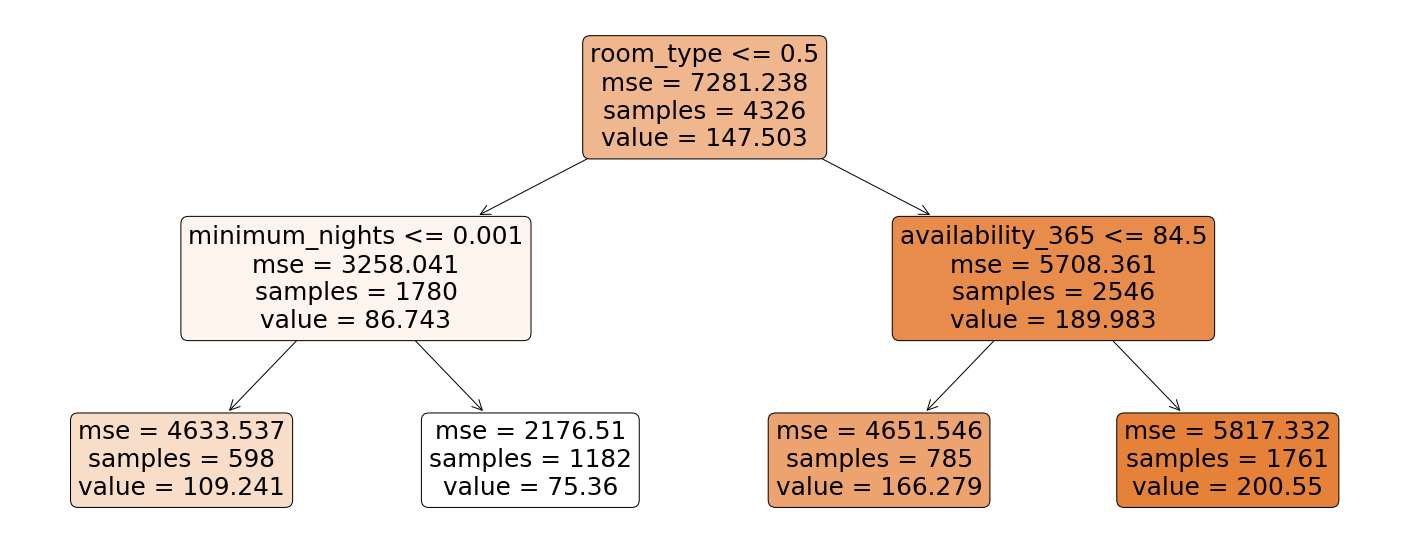

In [11]:
plt.figure(figsize=(25,10))
tree.plot_tree(tree_reg,
               feature_names =list(dfa.drop(['price'], axis=1)),
                rounded = True,
                filled= True)
plt.savefig('regression_tree.png',format='png')
plt.show() 

#### Evaluate the Model using testing

(i) By `mean squared error` function

In [12]:
#training mse
train_mse = mean_squared_error(tree_reg.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)

the training mean squared error is:  4447.359130127768


In [13]:
#testing mse
test_mse = mean_squared_error(tree_reg.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the testing mean squared error is:  4489.527929616785


(ii) By `R^2` function

In [14]:
#the score function for regressor is calculating R Squared Value of the regression model
# R Squared value rangs from 0 to 1 and the higher the better
train_R2 = tree_reg.score(X_train, y_train)
print('training R^2 value is: ', train_R2)

training R^2 value is:  0.38920292585333627


In [15]:
test_R2 = tree_reg.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

testing R^2 value is:  0.3726889531471137


(iii) By `RMSE`

In [16]:
#training rmse
train_mse = sqrt(mean_squared_error(tree_reg.predict(X_train), y_train))
print('the training root mean squared error is: ', train_mse)

the training root mean squared error is:  66.68852322647254


In [17]:
#testing rmse
test_mse = sqrt(mean_squared_error(tree_reg.predict(X_test), y_test))
print('the testing root mean squared error is: ', test_mse)

the testing root mean squared error is:  67.00393965743197


#### Improving the Model (By hyper tuning)

In [18]:
# Task 3: Use GridSearch to find the best combination of model hyperparameters

dt = tree.DecisionTreeRegressor(max_depth = 2)
param_grid = { "criterion" : ["mae", "mse"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], 'max_depth' : [2,3,4,5,6,7]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 10, n_jobs=-1)
# scoring --> get from https://scikit-learn.org/stable/modules/model_evaluation.html (choose any value under regression)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) 

print(gs.best_score_)
print(gs.best_params_) 

-3931.6975015087996
{'criterion': 'mse', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 4}


In [19]:
# Task 4: Create the final Decision Tree Regressor using the best hyperparameters
decision_tree = tree.DecisionTreeRegressor(criterion='mse', max_depth = 7, min_samples_leaf = 10, min_samples_split = 4, random_state=2)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=2, splitter='best')

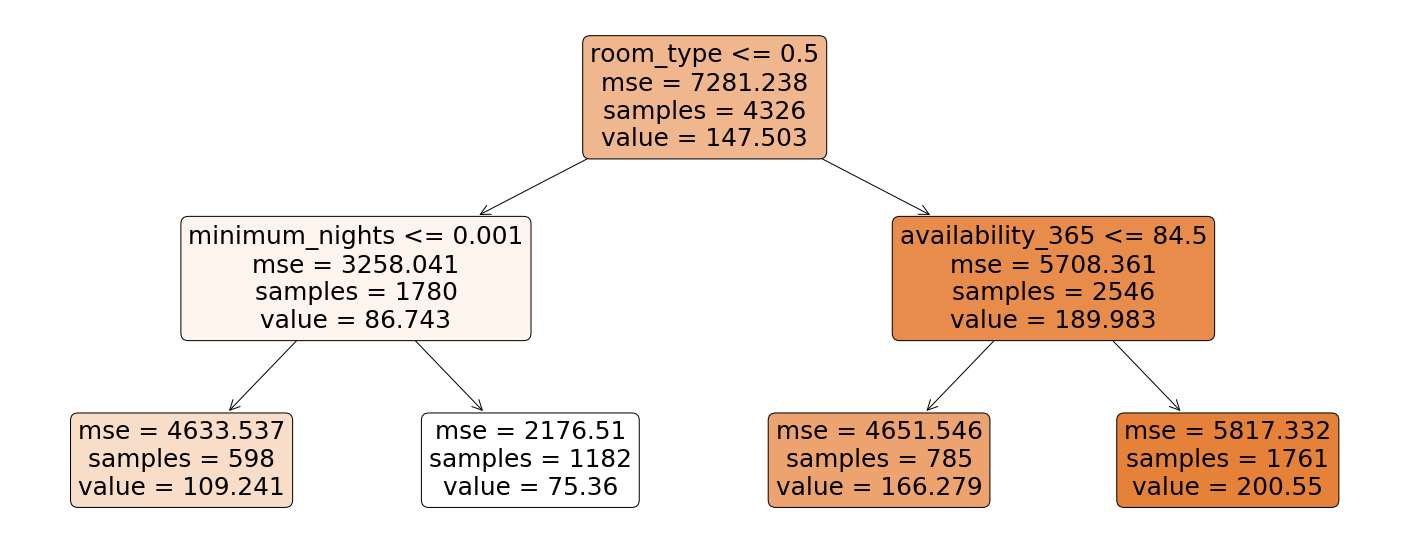

In [20]:
plt.figure(figsize=(25,10))
tree.plot_tree(tree_reg,
               feature_names =list(dfa.drop(['price'], axis=1)),
                rounded = True,
                filled= True)
plt.savefig('regression_tree.png',format='png')
plt.show() 

In [21]:
# Task 5: Evaluate the Model by calculating training mse and testing mse
#training mse
train_mse = mean_squared_error(decision_tree.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)

#testing mse
test_mse = mean_squared_error(decision_tree.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  3420.7605891545336
the testing mean squared error is:  3723.8396102859015


In [22]:
#the score function for regressor is calculating R Squared Value of the regression model
# R Squared value rangs from 0 to 1 and the higher the better
train_R2 = decision_tree.score(X_train, y_train)
print('training R^2 value is: ', train_R2)

test_R2 = decision_tree.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.5301952241595159
testing R^2 value is:  0.47967675870097787


In [23]:
#training rmse
train_mse = sqrt(mean_squared_error(decision_tree.predict(X_train), y_train))
print('the training root mean squared error is: ', train_mse)

#testing rmse
test_mse = sqrt(mean_squared_error(decision_tree.predict(X_test), y_test))
print('the testing root mean squared error is: ', test_mse)

the training root mean squared error is:  58.487268607403216
the testing root mean squared error is:  61.02327105527777


In [35]:
start = time.time()
dt = tree.DecisionTreeRegressor(max_depth = 2)
param_grid = { "criterion" : ["mae", "mse"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], 'max_depth' : [2,3,4,5,6,7]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 10, n_jobs=-1)
# scoring --> get from https://scikit-learn.org/stable/modules/model_evaluation.html (choose any value under regression)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) 

print(gs.best_score_)
print(gs.best_params_) 
print('Execution time: {0:.2f} seconds.'.format(time.time() - start))

-3931.6975015087996
{'criterion': 'mse', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 2}
Execution time: 100.25 seconds.


#### Comments on the Performance

As shown below, room type is indeed the best estimator to the pricing of Airbnb.

In [55]:
sorted(dict(zip(X_train.columns, gs.best_estimator_.feature_importances_)).items(), key=lambda x: x[1], reverse=True)

[('room_type', 0.6685960142367547),
 ('neighbourhood', 0.09903103876000578),
 ('minimum_nights', 0.07928459601288398),
 ('availability_365', 0.0710454665959672),
 ('calculated_host_listings_count', 0.03408765940732781),
 ('reviews_per_month', 0.01609507751876264),
 ('neighbourhood_group', 0.01518899665928417),
 ('number_of_reviews', 0.011997644164013773),
 ('month', 0.002857645112525838),
 ('day', 0.0018158615324740804),
 ('year', 0.0)]

In [118]:
import time
start = time.time()
dt = tree.DecisionTreeRegressor(max_depth = 2)
param_grid = { "criterion" : ["mae", "mse"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], 'max_depth' : [2,3,4,5,6,7]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='neg_mean_squared_error', cv= 10, n_jobs=-1)
# scoring --> get from https://scikit-learn.org/stable/modules/model_evaluation.html (choose any value under regression)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) 

print(gs.best_score_)
print(gs.best_params_) 
print('Execution time: {0:.2f} seconds.'.format(time.time() - start))

-3931.6975015087996
{'criterion': 'mse', 'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 4}
Execution time: 120.83 seconds.


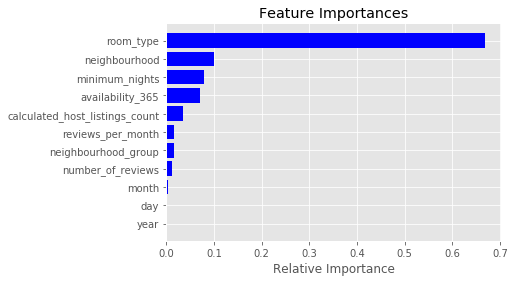

In [125]:
features = X_train.columns
importances = gs.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Plotting the kernel density estimation of actual values and predicted values on the same graph gives us an idea of how accurate the predictions are.

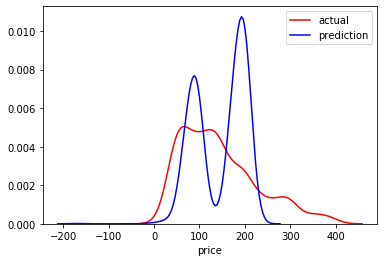

In [52]:
import seaborn as sns
ax1 = sns.distplot(y_test, hist = False, color = 'r', label = 'actual')
sns.distplot(y_pred, hist = False, color = 'b', label = 'prediction', ax = ax1)

**(i) R^2 Value**

**Before tuning hyperparameters**
* training R^2 value is:  0.389203
* testing R^2 value is:  0.389273

**After tuning hyperparameters**
* training R^2 value is:  0.530195
* testing R^2 value is:  0.479677

--> Recall: R^2 value is an intuitive measure of how well the linear model fits a set of observations\
--> We see a significant improvement in the R^2 value by 28.7% after tuning its hyperparameters. This is a good sign that the model fits the data better now.

**(ii) RMSE**

**Before tuning hyperparameters**
* the training root mean squared error is:  66.689
* the testing root mean squared error is:  66.123

**After tuning hyperparameters**
* the training root mean squared error is:  58.487
* the testing root mean squared error is:  61.023

--> 8.93% drop in the RMSE which suggests a smaller error in the model since the standard deviation would then be smaller away from the actual values

### 2.2.3 Using Artificial Neural Network

#### Train the Model using testing

In [44]:
# Task 1: Use GridSearch to find the best combination of model hyperparameters
param_grid = { "activation" : ['logistic', 'tanh', 'relu'], 
                "hidden_layer_sizes" : ((10,), (5,), (10,10), (11,11)), 
                "max_iter" : [200, 2000, 4000], 
                "solver" : ['sgd', 'adam'], 
                "random_state" : [3]}

gs = GridSearchCV(mlp, param_grid=param_grid, cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) 

print(gs.best_score_)
print(gs.best_params_)

C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.37470005707299947
{'activation': 'relu', 'hidden_layer_sizes': (5,), 'max_iter': 2000, 'random_state': 3, 'solver': 'adam'}


In [51]:
# Create the ann model
mlp = MLPRegressor(activation="relu", hidden_layer_sizes=(5,), max_iter= 2000, solver = 'adam', random_state=3)
# Fit the model to the training set
mlp.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(5,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=2000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=3, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [37]:
# print out the model coefficients and intercept
print(mlp.coefs_) #connecction weights

[array([[ 0.02817753,  0.11545934, -0.11598489,  0.00580647,  0.2179672 ,
         0.21982329, -0.20768737, -0.16239202, -0.24880059, -0.03283271,
        -0.26077709, -0.02394456,  0.08291145, -0.12287283,  0.09776838],
       [ 0.05040149, -0.26404667,  0.03264629, -0.1401491 , -0.04709326,
        -0.12007837,  0.10713337, -0.03303025, -0.19033505,  0.02476676,
         0.15549026, -0.10740991, -0.14793537, -0.06214221,  0.24206148],
       [ 0.26403408,  0.09562101,  0.22345159,  0.19159332, -0.06767656,
        -0.22619673,  0.08509684,  0.0320842 , -0.07678986, -0.15251193,
        -0.05185329, -0.01722881, -0.12783846, -0.11549229, -0.0234713 ],
       [ 0.19998772,  0.04784438, -0.12009902, -0.12315616, -0.02517108,
        -0.16340852, -0.16564486,  0.00778523, -0.22896337, -0.00910509,
        -0.07645069,  0.11520352,  0.13687218,  0.10599901,  0.10493814],
       [-0.07011386,  0.09326417, -0.08883575,  0.03989057, -0.09662456,
        -0.03042797, -0.24321937, -0.14273763,

In [39]:
len(dfa.columns)

12

We have 12 attributes (input columns) and that is fully connected to all 10 neurons of the first layer (11 x 10)
However, a problem with neural networks --> you have built this model but you are not able to understand how the numbers help make decisions

In [40]:
print(mlp.intercepts_) #bias value (we have 10 bias for the 10 neurons in the hidden layer)

[array([ 0.18509673,  0.20644805, -0.22624469, -0.15777041,  0.18402794,
        0.19320424, -0.10281202, -0.12242533, -0.03837692,  0.02188098,
       -0.22433917,  0.18688523,  0.01946543,  0.1525247 , -0.14930518]), array([1.2765349 , 1.65864724, 1.74154514, 1.29923293, 1.36116559,
       1.73757429, 1.18774676, 1.67677282, 1.4671849 , 1.4885791 ]), array([17.7130724])]


#### Evaluate the Model using testing

(i) By `mean squared error` function

In [52]:
#training mse
train_mse = mean_squared_error(mlp.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)

the training mean squared error is:  4503.7524431419815


In [53]:
#testing mse
test_mse = mean_squared_error(mlp.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the testing mean squared error is:  4430.528839063504


(ii) By `Score` function

In [54]:
#the score function for regressor is calculating R Squared Value of the regression model
# R Squared value ranges from 0 to 1 and the higher the better
train_R2 = mlp.score(X_train, y_train)
print('training R^2 value is: ', train_R2)

training R^2 value is:  0.38145790918553946


In [55]:
test_R2 = mlp.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

testing R^2 value is:  0.38093275557769696


(iii) By `RMSE`

In [56]:
#training rmse
train_mse = sqrt(mean_squared_error(mlp.predict(X_train), y_train))
print('the training root mean squared error is: ', train_mse)

the training root mean squared error is:  67.11000255656366


In [57]:
#testing rmse
test_mse = sqrt(mean_squared_error(mlp.predict(X_test), y_test))
print('the testing root mean squared error is: ', test_mse)

the testing root mean squared error is:  66.56221780457368


#### Improving the Model (By adjusting the hyperparameters)

In [52]:
# Task 1: Use GridSearch to find the best combination of model hyperparameters
param_grid = { "activation" : ['logistic', 'tanh', 'relu'], 
                "hidden_layer_sizes" : ((10,),(10,10), (11,11)), 
                "max_iter" : [1000, 2000, 4000], 
                "solver" : ['sgd', 'adam'], 
                "random_state" : [3]}

gs = GridSearchCV(mlp, param_grid=param_grid, cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) 

print(gs.best_score_)
print(gs.best_params_)

C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.36496737743942864
{'activation': 'relu', 'hidden_layer_sizes': (10, 10), 'max_iter': 1000, 'random_state': 3, 'solver': 'adam'}


In [53]:
# Create the ann model
mlp = MLPRegressor(activation="relu", hidden_layer_sizes=(10, 10), max_iter= 1000, solver = 'adam', random_state=3)
# Fit the model to the training set
mlp.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 10), learning_rate='constant',
             learning_rate_init=0.001, max_iter=1000, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=3, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

(i) By `mean squared error` function

In [54]:
#training mse
train_mse = mean_squared_error(mlp.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)

the training mean squared error is:  4476.3213528531805


In [55]:
#testing mse
test_mse = mean_squared_error(mlp.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the testing mean squared error is:  4393.457694477239


(ii) By `Score` function

In [56]:
#the score function for regressor is calculating R Squared Value of the regression model
# R Squared value ranges from 0 to 1 and the higher the better
train_R2 = mlp.score(X_train, y_train)
print('training R^2 value is: ', train_R2)

training R^2 value is:  0.3852252752108173


In [57]:
test_R2 = mlp.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

testing R^2 value is:  0.3861126183345435


(iii) By `RMSE`

In [58]:
#training rmse
train_mse = sqrt(mean_squared_error(mlp.predict(X_train), y_train))
print('the training root mean squared error is: ', train_mse)

the training root mean squared error is:  66.90531632727836


In [59]:
#testing rmse
test_mse = sqrt(mean_squared_error(mlp.predict(X_test), y_test))
print('the testing root mean squared error is: ', test_mse)

the testing root mean squared error is:  66.2831629788232


#### Comments on the Performance

In [36]:
start = time.time()
# Create the ann model
mlp = MLPRegressor(activation="logistic", hidden_layer_sizes=(15,10), max_iter= 2000, solver = 'sgd', random_state=3)
# Fit the model to the training set
mlp.fit(X_train,y_train)

print('Execution time: {0:.2f} seconds.'.format(time.time() - start))

Execution time: 0.21 seconds.


### 2.2.4 Using Ensemble Models

#### Train the Model using testing

In [8]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

In [9]:
# Build Descision tree Model and Evaluate both training and testing accuracy
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

train_R2 = dt.score(X_train, y_train)
print('training R^2 value is: ', train_R2)
test_R2 = dt.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.9765339085863795
testing R^2 value is:  0.22317779868365173


In [10]:
#training mse
train_mse = mean_squared_error(dt.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing mse
test_mse = mean_squared_error(dt.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  170.8622066380735
the testing mean squared error is:  5559.546554540468


In [11]:
#training rmse
train_mse = sqrt(mean_squared_error(dt.predict(X_train), y_train))
print('the training root mean squared error is: ', train_mse)
#testing rmse
test_mse = sqrt(mean_squared_error(dt.predict(X_test), y_test))
print('the testing root mean squared error is: ', test_mse)

the training root mean squared error is:  13.071427107935595
the testing root mean squared error is:  74.5623668786102


#### Improve the Overfitted Model's Testing Accuracy

#### 1. Random Forest - Ensemble of Descision Trees  <a id='rf' />

In [52]:
# import the regressor 
from sklearn.ensemble import RandomForestRegressor 

#Task 1: Build Random Forest Model and Evaluate both training and testing accuracy
rfr = RandomForestRegressor(n_estimators = 50, max_depth = 7) #n_estimators: The number of decision tree models in the forest.
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [56]:
# Build Descision tree Model and Evaluate both training and testing accuracy
train_R2 = rfr.score(X_train, y_train)
print('training R^2 value is: ', train_R2)
test_R2 = rfr.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.5985454696140275
testing R^2 value is:  0.5104133435527999


In [57]:
#training mse
train_mse = mean_squared_error(rfr.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing mse
test_mse = mean_squared_error(rfr.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  2923.086155148313
the testing mean squared error is:  3503.864596541799


In [58]:
#training rmse
train_mse = sqrt(mean_squared_error(rfr.predict(X_train), y_train))
print('the training root mean squared error is: ', train_mse)
#testing rmse
test_mse = sqrt(mean_squared_error(rfr.predict(X_test), y_test))
print('the testing root mean squared error is: ', test_mse)

the training root mean squared error is:  54.065572734858854
the testing root mean squared error is:  59.19345062202236


#### Attempt to improve accuracies

##### (i) Gridsearch

In [67]:
# Perform Grid-Search
gsc = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        'max_depth': range(3,7),
        'n_estimators': (10, 50, 100, 1000),
    },
    cv=5, scoring='neg_mean_squared_error', verbose=True, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_
best_params

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   24.1s finished


{'max_depth': 6, 'n_estimators': 1000}

In [53]:
rfr = RandomForestRegressor(max_depth=6, n_estimators=1000,
                            random_state=False, verbose=False)
rfr = rfr.fit(X_train, y_train) 

In [73]:
# Perform K-Fold CV
scores = cross_val_score(rfr, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
scores

array([-46.7058103 , -44.96321334, -43.85190198, -48.71471263,
       -47.16108203, -41.85591757, -46.05912264, -45.46550635,
       -43.65581663, -46.63715794])

In [70]:
print_results(grid_result)

BEST PARAM: {'max_depth': 6, 'n_estimators': 1000}

-4180.883 (+/1 127.457) for {'max_depth': 3, 'n_estimators': 10}
-4167.548 (+/1 122.878) for {'max_depth': 3, 'n_estimators': 50}
-4166.726 (+/1 134.629) for {'max_depth': 3, 'n_estimators': 100}
-4163.392 (+/1 125.75) for {'max_depth': 3, 'n_estimators': 1000}
-3995.312 (+/1 141.171) for {'max_depth': 4, 'n_estimators': 10}
-3955.402 (+/1 145.242) for {'max_depth': 4, 'n_estimators': 50}
-3952.09 (+/1 133.317) for {'max_depth': 4, 'n_estimators': 100}
-3948.593 (+/1 135.652) for {'max_depth': 4, 'n_estimators': 1000}
-3838.675 (+/1 142.188) for {'max_depth': 5, 'n_estimators': 10}
-3786.767 (+/1 102.163) for {'max_depth': 5, 'n_estimators': 50}
-3791.33 (+/1 133.674) for {'max_depth': 5, 'n_estimators': 100}
-3784.013 (+/1 124.241) for {'max_depth': 5, 'n_estimators': 1000}
-3760.269 (+/1 164.693) for {'max_depth': 6, 'n_estimators': 10}
-3679.788 (+/1 94.059) for {'max_depth': 6, 'n_estimators': 50}
-3683.021 (+/1 95.047) for {'max_

In [65]:
print("Mean Cross Validation Score: ", scores.mean())

Mean Cross Validation Score:  -46.74386567814902


In [55]:
# Build Descision tree Model and Evaluate both training and testing accuracy
train_R2 = rfr.score(X_train, y_train)
print('training R^2 value is: ', train_R2)
test_R2 = rfr.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.5544100562190786
testing R^2 value is:  0.49223998523690554


In [76]:
#training mse
train_mse = mean_squared_error(rfr.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing mse
test_mse = mean_squared_error(rfr.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  3244.446623349996
the testing mean squared error is:  3633.927346342657


In [77]:
#training rmse
train_mse = sqrt(mean_squared_error(rfr.predict(X_train), y_train))
print('the training root mean squared error is: ', train_mse)
#testing rmse
test_mse = sqrt(mean_squared_error(rfr.predict(X_test), y_test))
print('the testing root mean squared error is: ', test_mse)

the training root mean squared error is:  56.96004409540073
the testing root mean squared error is:  60.28206488121203


##### (ii) After decreasing the values of n_estimators available

In [82]:
# Perform Grid-Search
gsc = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        'max_depth': range(3,7),
        'n_estimators': (10, 25, 50, 75),
    },
    cv=5, scoring='neg_mean_squared_error', verbose=True, n_jobs=-1)

grid_result = gsc.fit(X_a, y_a)
best_params = grid_result.best_params_
best_params

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   16.8s finished


{'max_depth': 6, 'n_estimators': 75}

In [21]:
print_results(grid_result)

BEST PARAM: {'max_depth': 6, 'n_estimators': 75}

-4355.246 (+/1 969.774) for {'max_depth': 3, 'n_estimators': 10}
-4348.055 (+/1 965.541) for {'max_depth': 3, 'n_estimators': 25}
-4320.201 (+/1 982.943) for {'max_depth': 3, 'n_estimators': 50}
-4330.021 (+/1 955.043) for {'max_depth': 3, 'n_estimators': 75}
-4145.294 (+/1 812.148) for {'max_depth': 4, 'n_estimators': 10}
-4132.394 (+/1 802.176) for {'max_depth': 4, 'n_estimators': 25}
-4125.89 (+/1 829.456) for {'max_depth': 4, 'n_estimators': 50}
-4127.854 (+/1 807.763) for {'max_depth': 4, 'n_estimators': 75}
-4016.956 (+/1 798.77) for {'max_depth': 5, 'n_estimators': 10}
-4018.697 (+/1 853.83) for {'max_depth': 5, 'n_estimators': 25}
-3985.085 (+/1 822.808) for {'max_depth': 5, 'n_estimators': 50}
-3988.646 (+/1 787.512) for {'max_depth': 5, 'n_estimators': 75}
-3945.449 (+/1 668.782) for {'max_depth': 6, 'n_estimators': 10}
-3890.621 (+/1 711.471) for {'max_depth': 6, 'n_estimators': 25}
-3883.547 (+/1 756.323) for {'max_depth': 6

In [83]:
# Perform K-Fold CV
scores = cross_val_score(rfr, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
scores

array([-46.64222088, -45.01853832, -43.91775248, -48.81229367,
       -47.13223202, -42.10680279, -46.04462981, -45.51190563,
       -43.97770277, -46.52777937])

In [84]:
rfr = RandomForestRegressor(max_depth=6, n_estimators=75,
                            random_state=False, verbose=False)
rfr = rfr.fit(X_train, y_train) 

In [85]:
print("Mean Cross Validation Score: ", scores.mean())

Mean Cross Validation Score:  -45.56918577345663


In [87]:
# Build Descision tree Model and Evaluate both training and testing accuracy
train_R2 = rfr.score(X_train, y_train)
print('training R^2 value is: ', train_R2)
test_R2 = rfr.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.5537745427045657
testing R^2 value is:  0.491366308225632


In [88]:
#training mse
train_mse = mean_squared_error(rfr.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing mse
test_mse = mean_squared_error(rfr.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  3249.073948775608
the testing mean squared error is:  3640.180061583772


In [89]:
#training rmse
train_mse = sqrt(mean_squared_error(rfr.predict(X_train), y_train))
print('the training root mean squared error is: ', train_mse)
#testing rmse
test_mse = sqrt(mean_squared_error(rfr.predict(X_test), y_test))
print('the testing root mean squared error is: ', test_mse)

the training root mean squared error is:  57.00064866977926
the testing root mean squared error is:  60.33390474338431


##### (iii) After further decreasing the values of n_estimators and max_depth available

In [92]:
# Perform Grid-Search
gsc = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        'max_depth': range(3,6),
        'n_estimators': (10, 25, 50),
    },
    cv=5, scoring='neg_mean_squared_error', verbose=True, n_jobs=-1)

grid_result = gsc.fit(X_a, y_a)
best_params = grid_result.best_params_
best_params

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    2.6s finished


{'max_depth': 5, 'n_estimators': 50}

In [93]:
print_results(grid_result)

BEST PARAM: {'max_depth': 5, 'n_estimators': 50}

-4338.166 (+/1 1008.54) for {'max_depth': 3, 'n_estimators': 10}
-4323.046 (+/1 953.787) for {'max_depth': 3, 'n_estimators': 25}
-4330.619 (+/1 971.929) for {'max_depth': 3, 'n_estimators': 50}
-4160.63 (+/1 784.06) for {'max_depth': 4, 'n_estimators': 10}
-4118.729 (+/1 823.84) for {'max_depth': 4, 'n_estimators': 25}
-4122.525 (+/1 839.295) for {'max_depth': 4, 'n_estimators': 50}
-4018.086 (+/1 779.598) for {'max_depth': 5, 'n_estimators': 10}
-3991.742 (+/1 815.774) for {'max_depth': 5, 'n_estimators': 25}
-3991.277 (+/1 834.498) for {'max_depth': 5, 'n_estimators': 50}


In [94]:
# Perform K-Fold CV
scores = cross_val_score(rfr, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
scores

array([-46.51774395, -44.95680046, -43.72692572, -48.8903982 ,
       -47.19180298, -41.92002408, -46.00863743, -45.5045163 ,
       -43.83597054, -46.47981266])

In [95]:
rfr = RandomForestRegressor(max_depth=5, n_estimators=50,
                            random_state=False, verbose=False)
rfr = rfr.fit(X_train, y_train) 

In [96]:
print("Mean Cross Validation Score: ", scores.mean())

Mean Cross Validation Score:  -45.50326323107477


In [98]:
# Build Descision tree Model and Evaluate both training and testing accuracy
train_R2 = rfr.score(X_train, y_train)
print('training R^2 value is: ', train_R2)
test_R2 = rfr.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.5125739585618708
testing R^2 value is:  0.46650222024870647


In [99]:
#training mse
train_mse = mean_squared_error(rfr.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing mse
test_mse = mean_squared_error(rfr.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  3549.065225435872
the testing mean squared error is:  3818.126899881734


In [100]:
#training rmse
train_mse = sqrt(mean_squared_error(rfr.predict(X_train), y_train))
print('the training root mean squared error is: ', train_mse)
#testing rmse
test_mse = sqrt(mean_squared_error(rfr.predict(X_test), y_test))
print('the testing root mean squared error is: ', test_mse)

the training root mean squared error is:  59.57403146871858
the testing root mean squared error is:  61.79099367935213


##### (iv) After increasing the values of n_estimators available

In [76]:
# Perform Grid-Search
gsc = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid={
        'max_depth': range(5,10),
        'n_estimators': (1000, 2000, 3000),
    },
    cv=5, scoring='neg_mean_squared_error', verbose=True, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_
best_params

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  4.1min finished


{'max_depth': 9, 'n_estimators': 2000}

In [77]:
print_results(grid_result)

BEST PARAM: {'max_depth': 9, 'n_estimators': 2000}

-3787.204 (+/1 126.758) for {'max_depth': 5, 'n_estimators': 1000}
-3789.23 (+/1 126.136) for {'max_depth': 5, 'n_estimators': 2000}
-3786.799 (+/1 124.097) for {'max_depth': 5, 'n_estimators': 3000}
-3660.062 (+/1 107.199) for {'max_depth': 6, 'n_estimators': 1000}
-3663.176 (+/1 104.86) for {'max_depth': 6, 'n_estimators': 2000}
-3661.714 (+/1 104.203) for {'max_depth': 6, 'n_estimators': 3000}
-3559.473 (+/1 89.666) for {'max_depth': 7, 'n_estimators': 1000}
-3557.443 (+/1 85.641) for {'max_depth': 7, 'n_estimators': 2000}
-3555.725 (+/1 95.006) for {'max_depth': 7, 'n_estimators': 3000}
-3458.563 (+/1 92.234) for {'max_depth': 8, 'n_estimators': 1000}
-3456.591 (+/1 80.464) for {'max_depth': 8, 'n_estimators': 2000}
-3456.702 (+/1 79.659) for {'max_depth': 8, 'n_estimators': 3000}
-3369.653 (+/1 104.811) for {'max_depth': 9, 'n_estimators': 1000}
-3365.01 (+/1 94.041) for {'max_depth': 9, 'n_estimators': 2000}
-3369.116 (+/1 97.05

In [78]:
# Perform K-Fold CV
scores = cross_val_score(rfr, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
scores

array([-46.51774395, -44.95680046, -43.72692572, -48.8903982 ,
       -47.19180298, -41.92002408, -46.00863743, -45.5045163 ,
       -43.83597054, -46.47981266])

In [84]:
rfr = RandomForestRegressor(max_depth=9, n_estimators=2000,
                            random_state=False, verbose=False)
rfr = rfr.fit(X_train, y_train) 

In [85]:
print("Mean Cross Validation Score: ", scores.mean())

Mean Cross Validation Score:  -45.50326323107477


In [86]:
# Build Descision tree Model and Evaluate both training and testing accuracy
train_R2 = rfr.score(X_train, y_train)
print('training R^2 value is: ', train_R2)
test_R2 = rfr.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.6921038415525047
testing R^2 value is:  0.5374290556271921


In [87]:
#training mse
train_mse = mean_squared_error(rfr.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing mse
test_mse = mean_squared_error(rfr.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  2241.8653418007934
the testing mean squared error is:  3310.519055274911


In [88]:
#training rmse
train_mse = sqrt(mean_squared_error(rfr.predict(X_train), y_train))
print('the training root mean squared error is: ', train_mse)
#testing rmse
test_mse = sqrt(mean_squared_error(rfr.predict(X_test), y_test))
print('the testing root mean squared error is: ', test_mse)

the training root mean squared error is:  47.348340433438565
the testing root mean squared error is:  57.53711024438846


Random forest is bagging (not boosting) and it uses decision trees by default.

#### 2. Ada Boost <a id='adb' />

In [11]:
#Task: Build Ada Boost Model and Evaluate both training and testing accuracy

adb = AdaBoostRegressor(DecisionTreeRegressor(), n_estimators=5, learning_rate=1)
adb.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse',
                                                       max_depth=None,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=1, loss='linear', n_estimators=5,
                  random_s

In [12]:
from sklearn.model_selection import cross_val_score, cross_validate

# Evaluate the Model using K-folds Cross validation
results  = cross_validate(adb, X_train, y_train, scoring='r2', cv=5, return_train_score = True)
print('training R^2 value is: ', np.mean(results['train_score']))
print('testing R^2 value is: ', np.mean(results['test_score']))

training R^2 value is:  0.9639871935670505
testing R^2 value is:  0.4184759622362999


In [13]:
from sklearn.model_selection import cross_val_score, cross_validate

# Perform Train K-Fold CV
scores = cross_val_score(adb, X_train, y_train, cv=10, scoring='r2')
print("R^2 Train Cross Validation Score: ", scores.mean())

# Perform Test K-Fold CV
scores = cross_val_score(adb, X_test, y_test, cv=10, scoring='r2')
print("R^2 Test Cross Validation Score: ", scores.mean())

R^2 Train Cross Validation Score:  0.43528856351052925
R^2 Test Cross Validation Score:  0.3069944635947396


In [31]:
# Perform Train K-Fold CV
scores = cross_val_score(adb, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
print("MSE Train Cross Validation Score: ", scores.mean())

# Perform Test K-Fold CV
scores = cross_val_score(adb, X_test, y_test, cv=10, scoring='neg_mean_squared_error')
print("MSE Test Cross Validation Score: ", scores.mean())

MSE Train Cross Validation Score:  -4313.1662418480655
MSE Test Cross Validation Score:  -4846.21718953104


In [32]:
import math

# Perform Train K-Fold CV
print("RMSE Train Cross Validation Score: ", math.sqrt(4173.804177986799))

# Perform Test K-Fold CV
print("RMSE Test Cross Validation Score: ", math.sqrt(5057.795800260936))

RMSE Train Cross Validation Score:  64.604985705337
RMSE Test Cross Validation Score:  71.11818192460305


#### Attempt to improve with GridSearch

In [158]:
# Perform Grid-Search
gsc = GridSearchCV(
    estimator=AdaBoostRegressor(),
    param_grid={
        'n_estimators' : [100, 200, 300, 400, 500],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1]
    },
    cv=5, scoring='neg_mean_squared_error', verbose=True, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_
best_params

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.5s finished


{'learning_rate': 0.01, 'n_estimators': 100}

In [159]:
print_results(grid_result)

BEST PARAM: {'learning_rate': 0.01, 'n_estimators': 100}

-4239.734 (+/1 126.484) for {'learning_rate': 0.0001, 'n_estimators': 100}
-4232.235 (+/1 93.042) for {'learning_rate': 0.0001, 'n_estimators': 200}
-4244.542 (+/1 134.399) for {'learning_rate': 0.0001, 'n_estimators': 300}
-4242.65 (+/1 110.47) for {'learning_rate': 0.0001, 'n_estimators': 400}
-4240.125 (+/1 120.932) for {'learning_rate': 0.0001, 'n_estimators': 500}
-4246.605 (+/1 104.481) for {'learning_rate': 0.001, 'n_estimators': 100}
-4242.04 (+/1 123.694) for {'learning_rate': 0.001, 'n_estimators': 200}
-4232.471 (+/1 115.447) for {'learning_rate': 0.001, 'n_estimators': 300}
-4234.863 (+/1 146.438) for {'learning_rate': 0.001, 'n_estimators': 400}
-4233.73 (+/1 140.976) for {'learning_rate': 0.001, 'n_estimators': 500}
-4227.886 (+/1 161.129) for {'learning_rate': 0.01, 'n_estimators': 100}
-4238.358 (+/1 135.077) for {'learning_rate': 0.01, 'n_estimators': 200}
-4293.003 (+/1 118.331) for {'learning_rate': 0.01, 'n_e

In [160]:
adb = AdaBoostRegressor(learning_rate=0.01, n_estimators=100,
                            random_state=False)
adb = adb.fit(X_train, y_train) 

In [161]:
from sklearn.model_selection import cross_val_score, cross_validate

# Perform K-Fold CV
scores = cross_val_score(adb, X_train, y_train, cv=10, scoring='r2')
print("R^2 Cross Validation Score: ", scores.mean())

R^2 Cross Validation Score:  0.41821729805347674


In [162]:
# Build Descision tree Model and Evaluate both training and testing accuracy
train_R2 = adb.score(X_train, y_train)
print('training R^2 value is: ', train_R2)
test_R2 = adb.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.4279743301104775
testing R^2 value is:  0.40666099888947627


In [163]:
#training mse
train_mse = mean_squared_error(adb.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing mse
test_mse = mean_squared_error(adb.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  4165.05529140724
the testing mean squared error is:  4246.397430079569


In [164]:
#training rmse
train_mse = sqrt(mean_squared_error(adb.predict(X_train), y_train))
print('the training root mean squared error is: ', train_mse)
#testing rmse
test_mse = sqrt(mean_squared_error(adb.predict(X_test), y_test))
print('the testing root mean squared error is: ', test_mse)

the training root mean squared error is:  64.53723957071018
the testing root mean squared error is:  65.16438774422399


#### Further Improvement with GridSearch

In [125]:
# Perform Grid-Search
gsc = GridSearchCV(
    estimator=AdaBoostRegressor(),
    param_grid={
        'n_estimators' : [200, 300, 400, 500],
        'learning_rate' : [0.05, 0.1, 0.5, 0.75]
    },
    cv=5, scoring='neg_mean_squared_error', verbose=True, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_
best_params

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    8.7s finished


{'learning_rate': 0.05, 'n_estimators': 200}

In [126]:
print_results(grid_result)

BEST PARAM: {'learning_rate': 0.05, 'n_estimators': 200}

-4504.322 (+/1 136.572) for {'learning_rate': 0.05, 'n_estimators': 200}
-4521.152 (+/1 222.557) for {'learning_rate': 0.05, 'n_estimators': 300}
-4532.321 (+/1 265.725) for {'learning_rate': 0.05, 'n_estimators': 400}
-4530.061 (+/1 176.287) for {'learning_rate': 0.05, 'n_estimators': 500}
-4545.788 (+/1 165.406) for {'learning_rate': 0.1, 'n_estimators': 200}
-4560.597 (+/1 268.486) for {'learning_rate': 0.1, 'n_estimators': 300}
-4547.485 (+/1 256.162) for {'learning_rate': 0.1, 'n_estimators': 400}
-4524.915 (+/1 133.653) for {'learning_rate': 0.1, 'n_estimators': 500}
-4594.601 (+/1 191.59) for {'learning_rate': 0.5, 'n_estimators': 200}
-4596.711 (+/1 305.588) for {'learning_rate': 0.5, 'n_estimators': 300}
-4626.444 (+/1 274.916) for {'learning_rate': 0.5, 'n_estimators': 400}
-4662.445 (+/1 425.606) for {'learning_rate': 0.5, 'n_estimators': 500}
-4569.58 (+/1 181.846) for {'learning_rate': 0.75, 'n_estimators': 200}
-46

In [127]:
# Perform K-Fold CV
scores = cross_val_score(rfr, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')
print("Mean Cross Validation Score: ", scores.mean())

Mean Cross Validation Score:  -42.635413537058724


In [128]:
adb = AdaBoostRegressor(learning_rate=0.05, n_estimators=200,
                            random_state=False)
adb = adb.fit(X_train, y_train) 

In [129]:
# Build Descision tree Model and Evaluate both training and testing accuracy
train_R2 = adb.score(X_train, y_train)
print('training R^2 value is: ', train_R2)
test_R2 = adb.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.38347639002917255
testing R^2 value is:  0.3485196866181721


In [130]:
#training mse
train_mse = mean_squared_error(adb.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing mse
test_mse = mean_squared_error(adb.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  4489.055402850063
the testing mean squared error is:  4662.502082813041


In [131]:
#training rmse
train_mse = sqrt(mean_squared_error(adb.predict(X_train), y_train))
print('the training root mean squared error is: ', train_mse)
#testing rmse
test_mse = sqrt(mean_squared_error(adb.predict(X_test), y_test))
print('the testing root mean squared error is: ', test_mse)

the training root mean squared error is:  67.00041345282925
the testing root mean squared error is:  68.2825166701773


#### Decrease the learning rate with GridSearch

In [132]:
# Perform Grid-Search
gsc = GridSearchCV(
    estimator=AdaBoostRegressor(),
    param_grid={
        'n_estimators' : [200, 300, 400, 500],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1]
    },
    cv=5, scoring='neg_mean_squared_error', verbose=True, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train)
best_params = grid_result.best_params_
best_params

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   23.4s finished


{'learning_rate': 0.001, 'n_estimators': 500}

In [133]:
print_results(grid_result)

BEST PARAM: {'learning_rate': 0.001, 'n_estimators': 500}

-4241.008 (+/1 132.577) for {'learning_rate': 0.0001, 'n_estimators': 200}
-4250.609 (+/1 140.503) for {'learning_rate': 0.0001, 'n_estimators': 300}
-4247.359 (+/1 121.669) for {'learning_rate': 0.0001, 'n_estimators': 400}
-4235.921 (+/1 102.304) for {'learning_rate': 0.0001, 'n_estimators': 500}
-4241.698 (+/1 146.533) for {'learning_rate': 0.001, 'n_estimators': 200}
-4239.627 (+/1 142.522) for {'learning_rate': 0.001, 'n_estimators': 300}
-4236.105 (+/1 127.076) for {'learning_rate': 0.001, 'n_estimators': 400}
-4233.449 (+/1 135.177) for {'learning_rate': 0.001, 'n_estimators': 500}
-4241.905 (+/1 146.61) for {'learning_rate': 0.01, 'n_estimators': 200}
-4285.541 (+/1 115.633) for {'learning_rate': 0.01, 'n_estimators': 300}
-4346.0 (+/1 112.369) for {'learning_rate': 0.01, 'n_estimators': 400}
-4393.339 (+/1 121.151) for {'learning_rate': 0.01, 'n_estimators': 500}
-4553.72 (+/1 108.379) for {'learning_rate': 0.1, 'n_est

In [135]:
adb = AdaBoostRegressor(learning_rate=0.001, n_estimators=500,
                            random_state=False)
adb = adb.fit(X_train, y_train) 

In [136]:
# Build Descision tree Model and Evaluate both training and testing accuracy
train_R2 = adb.score(X_train, y_train)
print('training R^2 value is: ', train_R2)
test_R2 = adb.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.43058535928335173
testing R^2 value is:  0.4052383636967114


In [137]:
#training mse
train_mse = mean_squared_error(adb.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing mse
test_mse = mean_squared_error(adb.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  4146.043765447925
the testing mean squared error is:  4256.578918933648


In [138]:
#training rmse
train_mse = sqrt(mean_squared_error(adb.predict(X_train), y_train))
print('the training root mean squared error is: ', train_mse)
#testing rmse
test_mse = sqrt(mean_squared_error(adb.predict(X_test), y_test))
print('the testing root mean squared error is: ', test_mse)

the training root mean squared error is:  64.38977997670068
the testing root mean squared error is:  65.24246254498406


#### 3. XGBoost - eXtreme Gradient Boosting  <a id='xgb' />
XGBoost is an algorithm that has recently been dominating applied machine learning and Kaggle competitions for structured or tabular data. Please click [here](https://machinelearningmastery.com/gentle-introduction-xgboost-applied-machine-learning/) to gain a better understanding on XGBoost. This webpage is also helpful for you to the complete below excercise.

First, you need to install `xgboost` package. 
* For windows users you can type `conda install -c anaconda py-xgboost` in Anaconda terminal to install; 
* For other operating systems, please refer to Anaconda website for details (click [here](https://anaconda.org/search?q=xgboost))

In [26]:
# import XGBClassifier from xgboost package
#import xgboost as xgb
from xgboost import XGBRegressor

In [27]:
# Task 3: Build XGBoost Model and Evaluate both training and testing accuracy 

# fit model no training data
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
print(xgb)

[16:40:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [28]:
# Perform Train K-Fold CV
scores = cross_val_score(xgb, X_train, y_train, cv=10, scoring='r2')
print("R^2 Train Cross Validation Score: ", scores.mean())

# Perform Test K-Fold CV
scores = cross_val_score(xgb, X_test, y_test, cv=10, scoring='r2')
print("R^2 Test Cross Validation Score: ", scores.mean())

[16:40:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2 Train Cross Validation Score:  0.49910753524180784
[16:41:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:41:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2 Test Cross Validation Score:  0.46700258355727586


R^2 Train Cross Validation Score:  0.49910753524180784\
R^2 Test Cross Validation Score:  0.46700258355727586

In [73]:
# Build Descision tree Model and Evaluate both training and testing accuracy
train_R2 = xgb.score(X_train, y_train)
print('training R^2 value is: ', train_R2)
test_R2 = xgb.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.5500172416563729
testing R^2 value is:  0.4878367214036664


In [74]:
#training mse
train_mse = mean_squared_error(xgb.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing msemy
test_mse = mean_squared_error(xgb.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  3276.431753566446
the testing mean squared error is:  3665.440542324099


In [75]:
#training rmse
train_mse = sqrt(mean_squared_error(xgb.predict(X_train), y_train))
print('the training root mean squared error is: ', train_mse)
#testing rmse
test_mse = sqrt(mean_squared_error(xgb.predict(X_test), y_test))
print('the testing root mean squared error is: ', test_mse)

the training root mean squared error is:  57.24012363339588
the testing root mean squared error is:  60.542881846870316


#### Attempt to improve with GridSearch 

In [76]:
# Perform Grid-Search
gsc = GridSearchCV(
    estimator=XGBRegressor(),
    param_grid={
        'n_estimators' : [200, 300, 400, 500],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
        'max_depth' : [1,3,5,7,9]
    },
    cv=5, scoring='neg_mean_squared_error', verbose=True, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train) 
best_params = grid_result.best_params_
best_params

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  2.4min finished
C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:09:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 500}

In [77]:
print_results(grid_result)

BEST PARAM: {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 500}

-27943.191 (+/1 1745.174) for {'learning_rate': 0.0001, 'max_depth': 1, 'n_estimators': 200}
-27483.217 (+/1 1722.211) for {'learning_rate': 0.0001, 'max_depth': 1, 'n_estimators': 300}
-27032.348 (+/1 1699.601) for {'learning_rate': 0.0001, 'max_depth': 1, 'n_estimators': 400}
-26590.402 (+/1 1677.338) for {'learning_rate': 0.0001, 'max_depth': 1, 'n_estimators': 500}
-27928.92 (+/1 1749.81) for {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 200}
-27462.044 (+/1 1729.114) for {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 300}
-27004.297 (+/1 1708.66) for {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 400}
-26555.451 (+/1 1688.899) for {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 500}
-27919.071 (+/1 1753.328) for {'learning_rate': 0.0001, 'max_depth': 5, 'n_estimators': 200}
-27447.251 (+/1 1734.03) for {'learning_rate': 0.0001, 'max_depth': 5, 'n_estimators': 300}


In [100]:
xgb = XGBRegressor(learning_rate=0.01, max_depth = 9, n_estimators=500)
xgb = xgb.fit(X_train, y_train) 

C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:35:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [101]:
# Perform Train K-Fold CV
scores = cross_val_score(xgb, X_train, y_train, cv=10, scoring='r2')
print("R^2 Train Cross Validation Score: ", scores.mean())

# Perform Test K-Fold CV
scores = cross_val_score(xgb, X_test, y_test, cv=10, scoring='r2')
print("R^2 Test Cross Validation Score: ", scores.mean())

[12:35:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:35:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:35:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:35:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:35:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:36:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:36:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:36:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:36:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:36:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2 Train Cross Validation Score:  0.5481626783431781
[12:36:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:36:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:36:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:36:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:36:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:36:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:36:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:36:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:36:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:36:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2 Test Cross Validation Score:  0.4360982419735276


R^2 Train Cross Validation Score:  0.5481626783431781 \
R^2 Test Cross Validation Score:  0.4360982419735276

In [92]:
#training mse
train_mse = mean_squared_error(xgb.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing mse
test_mse = mean_squared_error(xgb.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  1137.259152850188
the testing mean squared error is:  3163.0488854122773


In [93]:
#training rmse
train_mse = sqrt(mean_squared_error(xgb.predict(X_train), y_train))
print('the training root mean squared error is: ', train_mse)
#testing rmse
test_mse = sqrt(mean_squared_error(xgb.predict(X_test), y_test))
print('the testing root mean squared error is: ', test_mse)

the training root mean squared error is:  33.72327316335394
the testing root mean squared error is:  56.240989370851906


#### Attempt to further improve with GridSearch --> reduce max_depth and n_estimators

In [94]:
# Perform Grid-Search
gsc = GridSearchCV(
    estimator=XGBRegressor(),
    param_grid={
        'n_estimators' : [200, 300, 400],
        'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
        'max_depth' : [1,3,5]
    },
    cv=5, scoring='neg_mean_squared_error', verbose=True, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train) 
best_params = grid_result.best_params_
best_params

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:   35.2s finished
C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:31:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

In [95]:
print_results(grid_result)

BEST PARAM: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

-27943.191 (+/1 1745.174) for {'learning_rate': 0.0001, 'max_depth': 1, 'n_estimators': 200}
-27483.217 (+/1 1722.211) for {'learning_rate': 0.0001, 'max_depth': 1, 'n_estimators': 300}
-27032.348 (+/1 1699.601) for {'learning_rate': 0.0001, 'max_depth': 1, 'n_estimators': 400}
-27928.92 (+/1 1749.81) for {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 200}
-27462.044 (+/1 1729.114) for {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 300}
-27004.297 (+/1 1708.66) for {'learning_rate': 0.0001, 'max_depth': 3, 'n_estimators': 400}
-27919.071 (+/1 1753.328) for {'learning_rate': 0.0001, 'max_depth': 5, 'n_estimators': 200}
-27447.251 (+/1 1734.03) for {'learning_rate': 0.0001, 'max_depth': 5, 'n_estimators': 300}
-26984.628 (+/1 1714.929) for {'learning_rate': 0.0001, 'max_depth': 5, 'n_estimators': 400}
-20916.984 (+/1 1381.134) for {'learning_rate': 0.001, 'max_depth': 1, 'n_estimators': 200}
-1

In [102]:
xgb = XGBRegressor(learning_rate=0.1, max_depth = 5, n_estimators=200)
xgb = xgb.fit(X_train, y_train) 

C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:38:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [103]:
# Perform Train K-Fold CV
scores = cross_val_score(xgb, X_train, y_train, cv=10, scoring='r2')
print("R^2 Train Cross Validation Score: ", scores.mean())

# Perform Test K-Fold CV
scores = cross_val_score(xgb, X_test, y_test, cv=10, scoring='r2')
print("R^2 Test Cross Validation Score: ", scores.mean())

[12:38:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:38:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:38:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:38:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:38:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:38:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:38:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:38:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:38:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:38:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2 Train Cross Validation Score:  0.543645320526312
[12:38:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:38:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:38:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:38:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:38:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:38:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:38:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:38:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:38:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\sammi\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:38:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2 Test Cross Validation Score:  0.46841948304154324


I have managed to improve the testing R^2 value by 7.41% and at the same time, it has dipped the trainning R^2 value by 0.824%. 

R^2 Train Cross Validation Score:  0.543645320526312 \
R^2 Test Cross Validation Score:  0.46841948304154324

In [105]:
((0.5481626783431781 - 0.543645320526312)/0.5481626783431781)*100

0.8240907298760006

In [104]:
((0.46841948304154324 - 0.4360982419735276)/0.4360982419735276)*100

7.411458693744892

In [97]:
# Build Descision tree Model and Evaluate both training and testing accuracy
train_R2 = xgb.score(X_train, y_train)
print('training R^2 value is: ', train_R2)
test_R2 = xgb.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.7717763592145344
testing R^2 value is:  0.5309524562317328


In [98]:
#training mse
train_mse = mean_squared_error(xgb.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing mse
test_mse = mean_squared_error(xgb.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  1661.7507442652256
the testing mean squared error is:  3356.870660305187


In [99]:
#training rmse
train_mse = sqrt(mean_squared_error(xgb.predict(X_train), y_train))
print('the training root mean squared error is: ', train_mse)
#testing rmse
test_mse = sqrt(mean_squared_error(xgb.predict(X_test), y_test))
print('the testing root mean squared error is: ', test_mse)

the training root mean squared error is:  40.764577076982235
the testing root mean squared error is:  57.938507577475505


#### 4. SVM - Support Vector Machine  <a id='svm' />
To better understand the Support Vector Machine algorithm and the model hypterparameters, please click [here](https://www.linkedin.com/learning-login/share?forceAccount=false&redirect=https%3A%2F%2Fwww.linkedin.com%2Flearning%2Fapplied-machine-learning-algorithms%3Ftrk%3Dshare_ent_url&account=42538748) to watch the videos related to Support Vector Machine section of the course. 

(Note: remember to login to Linkedin Learning website using your NP student email).

In [10]:
# Task 4: Build SVM Model and Evaluate both training and testing accuracy 
from sklearn.svm import SVR
SVR()

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
dir(SVR)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_estimator_type',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_pairwise',
 '_sparse_decision_function',
 '_sparse_fit',
 '_sparse_kernels',
 '_sparse_predict',
 '_validate_for_predict',
 '_validate_targets',
 '_warn_from_fit_status',
 'coef_',
 'fit',
 'get_params',
 'predict',
 'score',
 'set_params']

In [106]:
svr = SVR(C=0.8, kernel='rbf')
svr.fit(X_train,y_train)

C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=0.8, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [101]:
# Perform Train K-Fold CV
scores = cross_val_score(svr, X_train, y_train, cv=10, scoring='r2')
print("R^2 Train Cross Validation Score: ", scores.mean())

# Perform Test K-Fold CV
scores = cross_val_score(svr, X_test, y_test, cv=10, scoring='r2')
print("R^2 Test Cross Validation Score: ", scores.mean())

C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

R^2 Train Cross Validation Score:  -0.012244250564337034


C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\sammi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

R^2 Test Cross Validation Score:  -0.019270703966498992


 R^2 Train Cross Validation Score:  -0.012244250564337034 \
R^2 Test Cross Validation Score:  -0.019270703966498992

In [102]:
# Build Descision tree Model and Evaluate both training and testing accuracy
train_R2 = svr.score(X_train, y_train)
print('training R^2 value is: ', train_R2)
test_R2 = svr.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.005534018084572989
testing R^2 value is:  0.01160132185909124


In [41]:
#training mse
train_mse = mean_squared_error(svr.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing mse
test_mse = mean_squared_error(svr.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  7240.943926347407
the testing mean squared error is:  7073.753113980418


In [42]:
#training rmse
train_mse = sqrt(mean_squared_error(svr.predict(X_train), y_train))
print('the training root mean squared error is: ', train_mse)
#testing rmse
test_mse = sqrt(mean_squared_error(svr.predict(X_test), y_test))
print('the testing root mean squared error is: ', test_mse)

the training root mean squared error is:  85.09373611698693
the testing root mean squared error is:  84.10560691167039


#### Understanding which kernel to use

Credits: https://www.kaggle.com/puxama/support-vector-regression-boston-data

In [84]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
import time

color = sns.color_palette()
sns.set_style('darkgrid')

# Prepare predictors list
predictors = []
for col in dfa.columns: 
    if col != 'price':
        predictors.append(col)

def launch_model(name,model, X_train, y_train, X_test, y_test):
    start = time.time()
    model.fit(X_train[predictors], y_train)
    y_pred = model.predict(X_test[predictors])
    ypred_train = model.predict(X_train[predictors])
    print ('RMSE train', sqrt(mean_squared_error(y_train, ypred_train)))
    print ('RMSE test', sqrt(mean_squared_error(y_test, y_pred)))
    r_2 = model.score(X_test[predictors], y_test)
    print ('R^2 test', r_2)
    print('Execution time: {0:.2f} seconds.'.format(time.time() - start))
    return name + '($R^2={:.3f}$)'.format(r_2), np.array(y_test), y_pred

In [75]:
def plot(results):

    # Using subplots to display the results on the same X axis
    fig, plts = plt.subplots(nrows=len(results), figsize=(8, 8))
    fig.canvas.set_window_title('Predicting Airbnb Prices')

    # Show each element in the plots returned from plt.subplots()
    for subplot, (title, y, y_pred) in zip(plts, results):
        # Configure each subplot to have no tick marks
        # (these are meaningless for the sample dataset)
        subplot.set_xticklabels(())
        subplot.set_yticklabels(())

        # Label the vertical axis
        subplot.set_ylabel('Price')

        # Set the title for the subplot
        subplot.set_title(title)

        # Plot the actual data and the prediction
        subplot.plot(y, 'b', label='actual')
        subplot.plot(y_pred, 'r', label='predicted')
        
        # Shade the area between the predicted and the actual values
        subplot.fill_between(
            # Generate X values [0, 1, 2, ..., len(y)-2, len(y)-1]
            np.arange(0, len(y), 1),
            y,
            y_pred,
            color='r',
            alpha=0.2
        )

        # Mark the extent of the training data
        subplot.axvline(len(y) // 2, linestyle='--', color='0', alpha=0.2)

        # Include a legend in each subplot
        subplot.legend()

    # Let matplotlib handle the subplot layout
    fig.tight_layout()

    # ==================================
    # Display the plot in interactive UI
    plt.show()

    # Closing the figure allows matplotlib to release the memory used.
    plt.close()

In [81]:
svr_rbf = SVR(kernel='rbf', gamma=0.1)
svr_linear = SVR(kernel='linear')
lr = LinearRegression()

In [89]:
results = []
print ('-----------')
print ('SVR - RBF')
print ('-----------')
results.append(launch_model('SVR - RBF', svr_rbf, X_train, y_train, X_test, y_test))
print ('-----------')
print ('SVR - linear')
print ('-----------')
results.append(launch_model('SVR - linear', svr_linear, X_train, y_train, X_test, y_test))
print ('-----------')
print ('Linear Regresion')
print ('-----------')
results.append(launch_model('Linear Regresion', lr, X_train, y_train, X_test, y_test))

-----------
SVR - RBF
-----------
RMSE train 84.7469205125412
RMSE test 83.87560658908143
R^2 test 0.016999800870378556
Execution time: 2.68 seconds.
-----------
SVR - linear
-----------
RMSE train 69.79309340901477
RMSE test 68.39979935819014
R^2 test 0.3462797872978341
Execution time: 3.25 seconds.
-----------
Linear Regresion
-----------
RMSE train 66.27838490770372
RMSE test 66.11232668831093
R^2 test 0.38927297123448695
Execution time: 0.01 seconds.


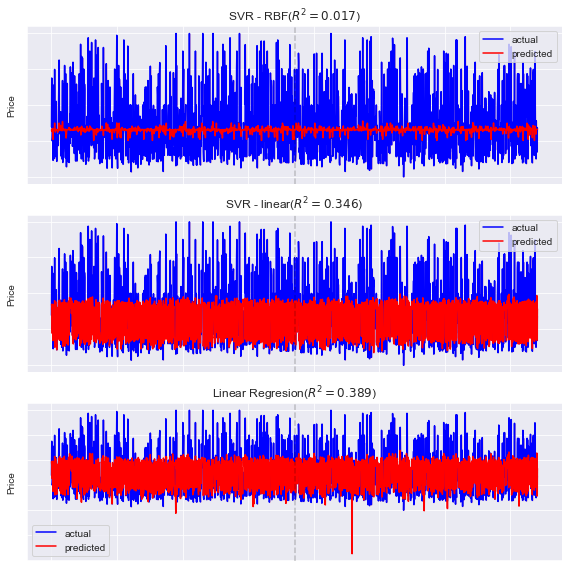

In [90]:
plot(results)

#### Attempt to improve with Linear Kernel

In [103]:
svr = SVR(C=0.8, kernel='linear')
svr.fit(X_train,y_train)

SVR(C=0.8, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [99]:
# Perform Train K-Fold CV
scores = cross_val_score(svr, X_train, y_train, cv=10, scoring='r2')
print("R^2 Train Cross Validation Score: ", scores.mean())

# Perform Test K-Fold CV
scores = cross_val_score(svr, X_test, y_test, cv=10, scoring='r2')
print("R^2 Test Cross Validation Score: ", scores.mean())

R^2 Train Cross Validation Score:  0.32111555208059184
R^2 Test Cross Validation Score:  0.31238161848781754


In [40]:
# Build Descision tree Model and Evaluate both training and testing accuracy
train_R2 = svr.score(X_train, y_train)
print('training R^2 value is: ', train_R2)
test_R2 = svr.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.005534018084572989
testing R^2 value is:  0.01160132185909124


In [104]:
#training mse
train_mse = mean_squared_error(svr.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing mse
test_mse = mean_squared_error(svr.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  4912.1400691218505
the testing mean squared error is:  4710.776470518291


In [105]:
#training rmse
train_mse = sqrt(mean_squared_error(svr.predict(X_train), y_train))
print('the training root mean squared error is: ', train_mse)
#testing rmse
test_mse = sqrt(mean_squared_error(svr.predict(X_test), y_test))
print('the testing root mean squared error is: ', test_mse)

the training root mean squared error is:  70.08666113549603
the testing root mean squared error is:  68.63509649237983


#### Further Improvement with Gamma

In [111]:
# Perform Grid-Search
gsc = GridSearchCV(
    estimator=SVR(),
    param_grid={
        'C': [0.8], 'gamma': [1,0.1,0.01,0.001],'kernel': ['linear']
    },
    cv=5, scoring='neg_mean_squared_error', verbose=True, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train) 
best_params = grid_result.best_params_
best_params

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   19.1s finished


{'C': 0.8, 'gamma': 1, 'kernel': 'linear'}

In [121]:
print_results(grid_result)

BEST PARAM: {'C': 0.8, 'gamma': 1, 'kernel': 'linear'}

-4952.322 (+/1 254.792) for {'C': 0.8, 'gamma': 1, 'kernel': 'linear'}
-4952.322 (+/1 254.792) for {'C': 0.8, 'gamma': 0.1, 'kernel': 'linear'}
-4952.322 (+/1 254.792) for {'C': 0.8, 'gamma': 0.01, 'kernel': 'linear'}
-4952.322 (+/1 254.792) for {'C': 0.8, 'gamma': 0.001, 'kernel': 'linear'}


In [124]:
svr = SVR(C=0.8, gamma = 1, kernel='linear')
svr.fit(X_train,y_train)

SVR(C=0.8, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [117]:
# Perform Train K-Fold CV
scores = cross_val_score(svr, X_train, y_train, cv=10, scoring='r2')
print("R^2 Train Cross Validation Score: ", scores.mean())

# Perform Test K-Fold CV
scores = cross_val_score(svr, X_test, y_test, cv=10, scoring='r2')
print("R^2 Test Cross Validation Score: ", scores.mean())

R^2 Train Cross Validation Score:  0.32111555208059184
R^2 Test Cross Validation Score:  0.31238161848781754


In [114]:
# Build Descision tree Model and Evaluate both training and testing accuracy
train_R2 = svr.score(X_train, y_train)
print('training R^2 value is: ', train_R2)
test_R2 = svr.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.325370249123097
testing R^2 value is:  0.34177442137819236


In [115]:
#training mse
train_mse = mean_squared_error(svr.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing mse
test_mse = mean_squared_error(svr.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  4912.1400691218505
the testing mean squared error is:  4710.776470518291


In [125]:
#training rmse
train_mse = sqrt(mean_squared_error(svr.predict(X_train), y_train))
print('the training root mean squared error is: ', train_mse)
#testing rmse
test_mse = sqrt(mean_squared_error(svr.predict(X_test), y_test))
print('the testing root mean squared error is: ', test_mse)

the training root mean squared error is:  70.08666113549603
the testing root mean squared error is:  68.63509649237983


In [32]:
# Perform Grid-Search
gsc = GridSearchCV(SVR(),
    param_grid={
        'C': [0.8], 'gamma': [1.5,2,2.5,3],'kernel': ['linear']
    },
    cv=5, scoring='neg_mean_squared_error', verbose=True, n_jobs=-1)

grid_result = gsc.fit(X_train, y_train) 
best_params = grid_result.best_params_
best_params

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   16.2s finished


{'C': 0.8, 'gamma': 1.5, 'kernel': 'linear'}

In [33]:
print_results(grid_result)

BEST PARAM: {'C': 0.8, 'gamma': 1.5, 'kernel': 'linear'}

-4952.322 (+/1 254.792) for {'C': 0.8, 'gamma': 1.5, 'kernel': 'linear'}
-4952.322 (+/1 254.792) for {'C': 0.8, 'gamma': 2, 'kernel': 'linear'}
-4952.322 (+/1 254.792) for {'C': 0.8, 'gamma': 2.5, 'kernel': 'linear'}
-4952.322 (+/1 254.792) for {'C': 0.8, 'gamma': 3, 'kernel': 'linear'}


In [34]:
from sklearn.model_selection import cross_val_score, GridSearchCV

svr = SVR(C=0.8, gamma = 2, kernel='linear')
svr.fit(X_train,y_train)

SVR(C=0.8, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=2,
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [35]:
# Perform Train K-Fold CV
scores = cross_val_score(svr, X_train, y_train, cv=10, scoring='r2')
print("R^2 Train Cross Validation Score: ", scores.mean())

# Perform Test K-Fold CV
scores = cross_val_score(svr, X_test, y_test, cv=10, scoring='r2')
print("R^2 Test Cross Validation Score: ", scores.mean())

R^2 Train Cross Validation Score:  0.32111555208059184
R^2 Test Cross Validation Score:  0.31238161848781754


In [29]:
# Build Descision tree Model and Evaluate both training and testing accuracy
train_R2 = svr.score(X_train, y_train)
print('training R^2 value is: ', train_R2)
test_R2 = svr.score(X_test, y_test)
print('testing R^2 value is: ', test_R2)

training R^2 value is:  0.325370249123097
testing R^2 value is:  0.34177442137819236


In [30]:
#training mse
train_mse = mean_squared_error(svr.predict(X_train), y_train)
print('the training mean squared error is: ', train_mse)
#testing mse
test_mse = mean_squared_error(svr.predict(X_test), y_test)
print('the testing mean squared error is: ',test_mse)

the training mean squared error is:  4912.1400691218505
the testing mean squared error is:  4710.776470518291


In [31]:
#training rmse
train_mse = sqrt(mean_squared_error(svr.predict(X_train), y_train))
print('the training root mean squared error is: ', train_mse)
#testing rmse
test_mse = sqrt(mean_squared_error(svr.predict(X_test), y_test))
print('the testing root mean squared error is: ', test_mse)

the training root mean squared error is:  70.08666113549603
the testing root mean squared error is:  68.63509649237983
